# Fire Modes Comparison

## Setting Up

In [1]:
import pandas as pd

%run weapon_full_data.ipynb

## Fire Modes Data

In [2]:
weapon_firemodes = weapon_data[ ["fire_mode", "time_units", "average_chance_to_hit", "turn_damage_expected", "damage_per_time_unit"] ]
weapon_firemodes = weapon_firemodes.groupby("fire_mode").mean()
weapon_firemodes

,time_units,average_chance_to_hit,turn_damage_expected,damage_per_time_unit
fire_mode,,,,
aimed,67.875000,0.528688,48.111250,1.232260
auto,35.000000,0.220000,90.654667,1.672569
grenade,75.000000,0.357500,28.600000,1.066667
melee,30.000000,0.550000,107.250000,2.166667
snapshot,34.863636,0.347250,65.008000,2.061134


## Chance to Hit

In [3]:
weapon_firemodes_to_hit = weapon_firemodes[["average_chance_to_hit"]]
weapon_firemodes_to_hit = weapon_firemodes_to_hit.sort_values(by=["average_chance_to_hit"])

Text(0, 0.5, 'Chance')

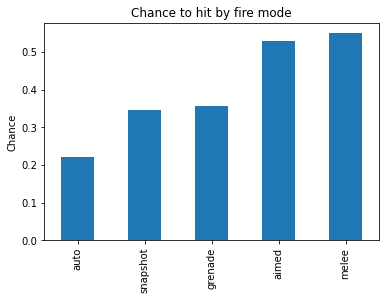

In [4]:
ax = weapon_firemodes_to_hit.plot.bar(title="Chance to hit by fire mode", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance")

## Damage

In [5]:
weapon_firemodes_damage = weapon_firemodes[["turn_damage_expected"]]
weapon_firemodes_damage = weapon_firemodes_damage.sort_values(by=["turn_damage_expected"])

Text(0, 0.5, 'Damage')

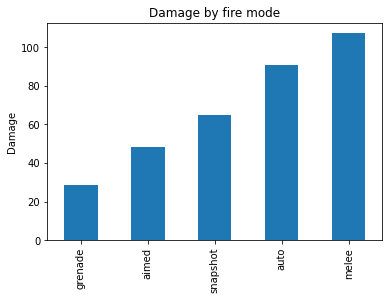

In [6]:
ax = weapon_firemodes_damage.plot.bar(title="Damage by fire mode", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

## Time Units

In [7]:
weapon_firemodes_tus = weapon_firemodes[["time_units"]]
weapon_firemodes_tus = weapon_firemodes_tus.sort_values(by=["time_units"])

Text(0, 0.5, 'Time units')

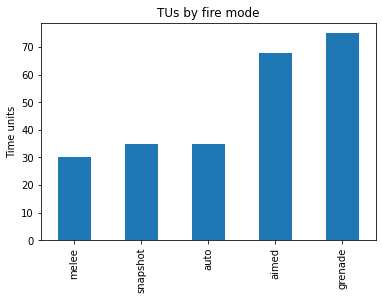

In [8]:
ax = weapon_firemodes_tus.plot.bar(title="TUs by fire mode", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Time units")

## Damage Per Time Unit

In [9]:
weapon_firemodes_dam_tu = weapon_firemodes[["damage_per_time_unit"]]
weapon_firemodes_dam_tu = weapon_firemodes_dam_tu.sort_values(by=["damage_per_time_unit"])

Text(0, 0.5, 'Ratio')

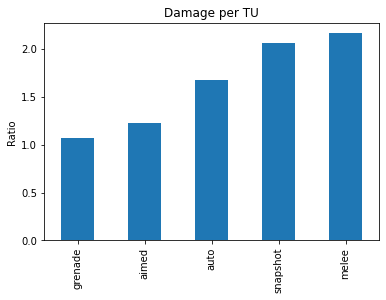

In [10]:
ax = weapon_firemodes_dam_tu.plot.bar(title="Damage per TU", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")